In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# df = pd.read_csv("~/cs148proj/M148_Project/spotify_dataset.csv")
df = pd.read_excel("/Users/ginnyghang/cs148proj/M148_Project/hannah/clean_data.xlsx")

Cleaning Data:
- improperly formatted removing NaN rows, or imputing
- invalid values - see column definitions
- messy column names
- complete data: no data is duplicated and none are missing from the data

In [7]:
print(df.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [8]:
na_rows = df[df.isnull().any(axis=1)]
na_rows

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [9]:
# Dropped entire row because all the identifiers are NaN. No inputation can be assumed for an unknown song.
print(df.shape)
new_df = df.dropna()
new_df.shape

(114000, 21)


(113999, 21)

In [7]:
# no duplicate rows
new_df.duplicated().sum()
# specific values

np.int64(0)

In [8]:
# duplicate rows based on track_id
dups = new_df[new_df.duplicated("track_id", keep=False)]
dups.sort_values("track_id")

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15028,15028,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,...,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,chill
103211,103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,...,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,soul
85578,85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,...,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,punk-rock
100420,100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,...,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska
91801,91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,...,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72679,72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,...,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
22326,22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,...,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,death-metal
2004,2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,...,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alt-rock
3100,3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,...,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative


In [9]:
# drop duplicates based on track_id
no_dups = new_df.drop_duplicates("track_id")

In [10]:
new_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


popularity: 0 - 100
duration_ms:
danceability: 0 - 1
energy: 0 - 1
key: 0 - 11
loudness: -49.53 - 4.53
mode: 0 or 1 (check if any values not 0 or 1)
speechiness: 0 - 1
acousticness: 0 - 1
instrumentalness: 0 - 1
liveness: 0 - 1
valence: 0 - 1
tempo: 0 - 243
time_signature: 3 - 7 (bad; the minumum is less than 3)

In [11]:
# Check if any values in the 'mode' column are not 0 or 1
invalid_modes = new_df['mode'].isin([0, 1]) == False
# If you want to see the specific rows where this is true
rows_invalid_modes = new_df[invalid_modes]
rows_invalid_modes

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [12]:
# 1136 rows (~1%) with invalid time signatures.
# Removing these rows will not significantly impact the size of our data. However, since their other fields are useful, we keep original.
rows_invalid_time_sig = new_df[new_df['time_signature'] < 3]
pct_invalid_time_sig = len(rows_invalid_time_sig)/len(new_df.index)
new_df = new_df[new_df['time_signature'] >= 3]
pct_invalid_time_sig

0.009964999692979763

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112863 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        112863 non-null  int64  
 1   track_id          112863 non-null  object 
 2   artists           112863 non-null  object 
 3   album_name        112863 non-null  object 
 4   track_name        112863 non-null  object 
 5   popularity        112863 non-null  int64  
 6   duration_ms       112863 non-null  int64  
 7   explicit          112863 non-null  bool   
 8   danceability      112863 non-null  float64
 9   energy            112863 non-null  float64
 10  key               112863 non-null  int64  
 11  loudness          112863 non-null  float64
 12  mode              112863 non-null  int64  
 13  speechiness       112863 non-null  float64
 14  acousticness      112863 non-null  float64
 15  instrumentalness  112863 non-null  float64
 16  liveness          112863 

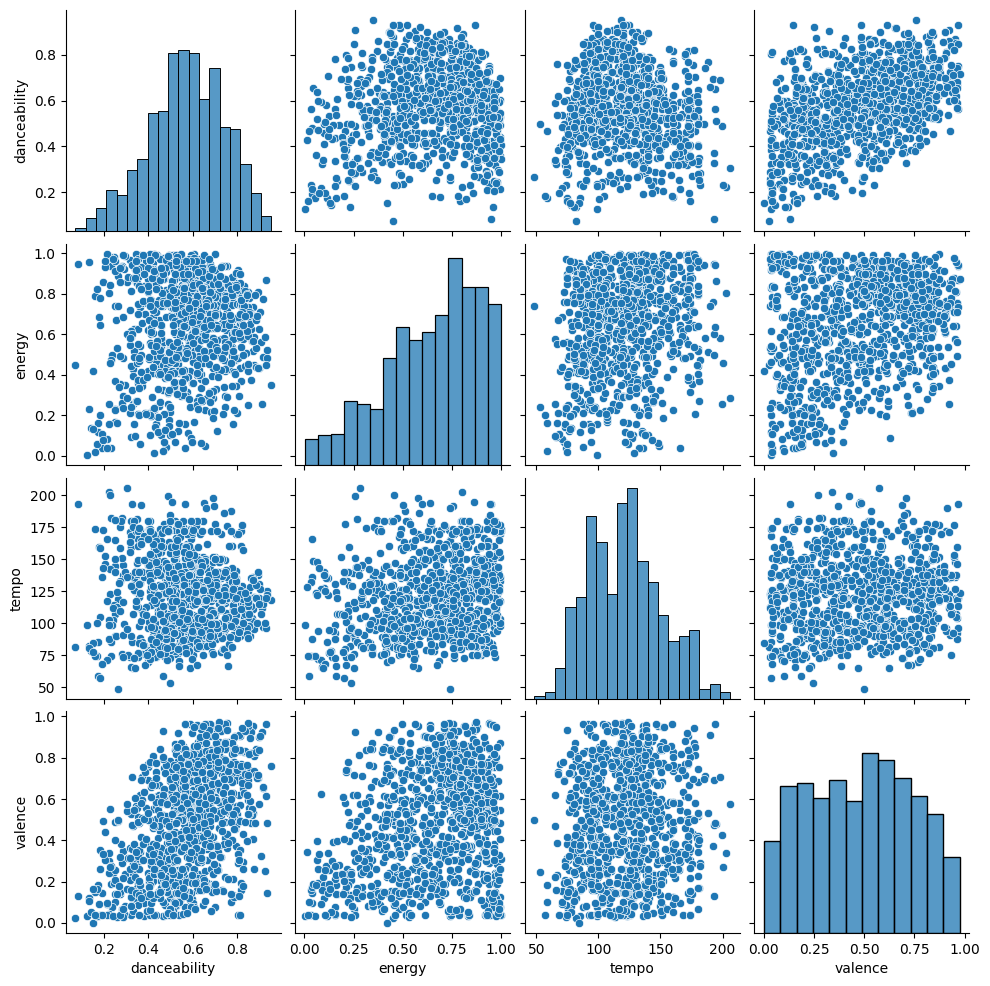

In [14]:
random_sample = new_df.sample(n=1000, replace=True, random_state=42)
sns.pairplot(random_sample[['danceability', 'energy', 'tempo', 'valence']])
plt.show()
# what does this show?

Unnamed: 0          15
popularity          15
duration_ms         15
danceability        15
energy              15
key                 15
loudness            15
mode                15
speechiness         15
acousticness        15
instrumentalness    15
liveness            15
valence             15
tempo               15
time_signature      15
dtype: int64
Index(['Unnamed: 0', 'popularity', 'duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


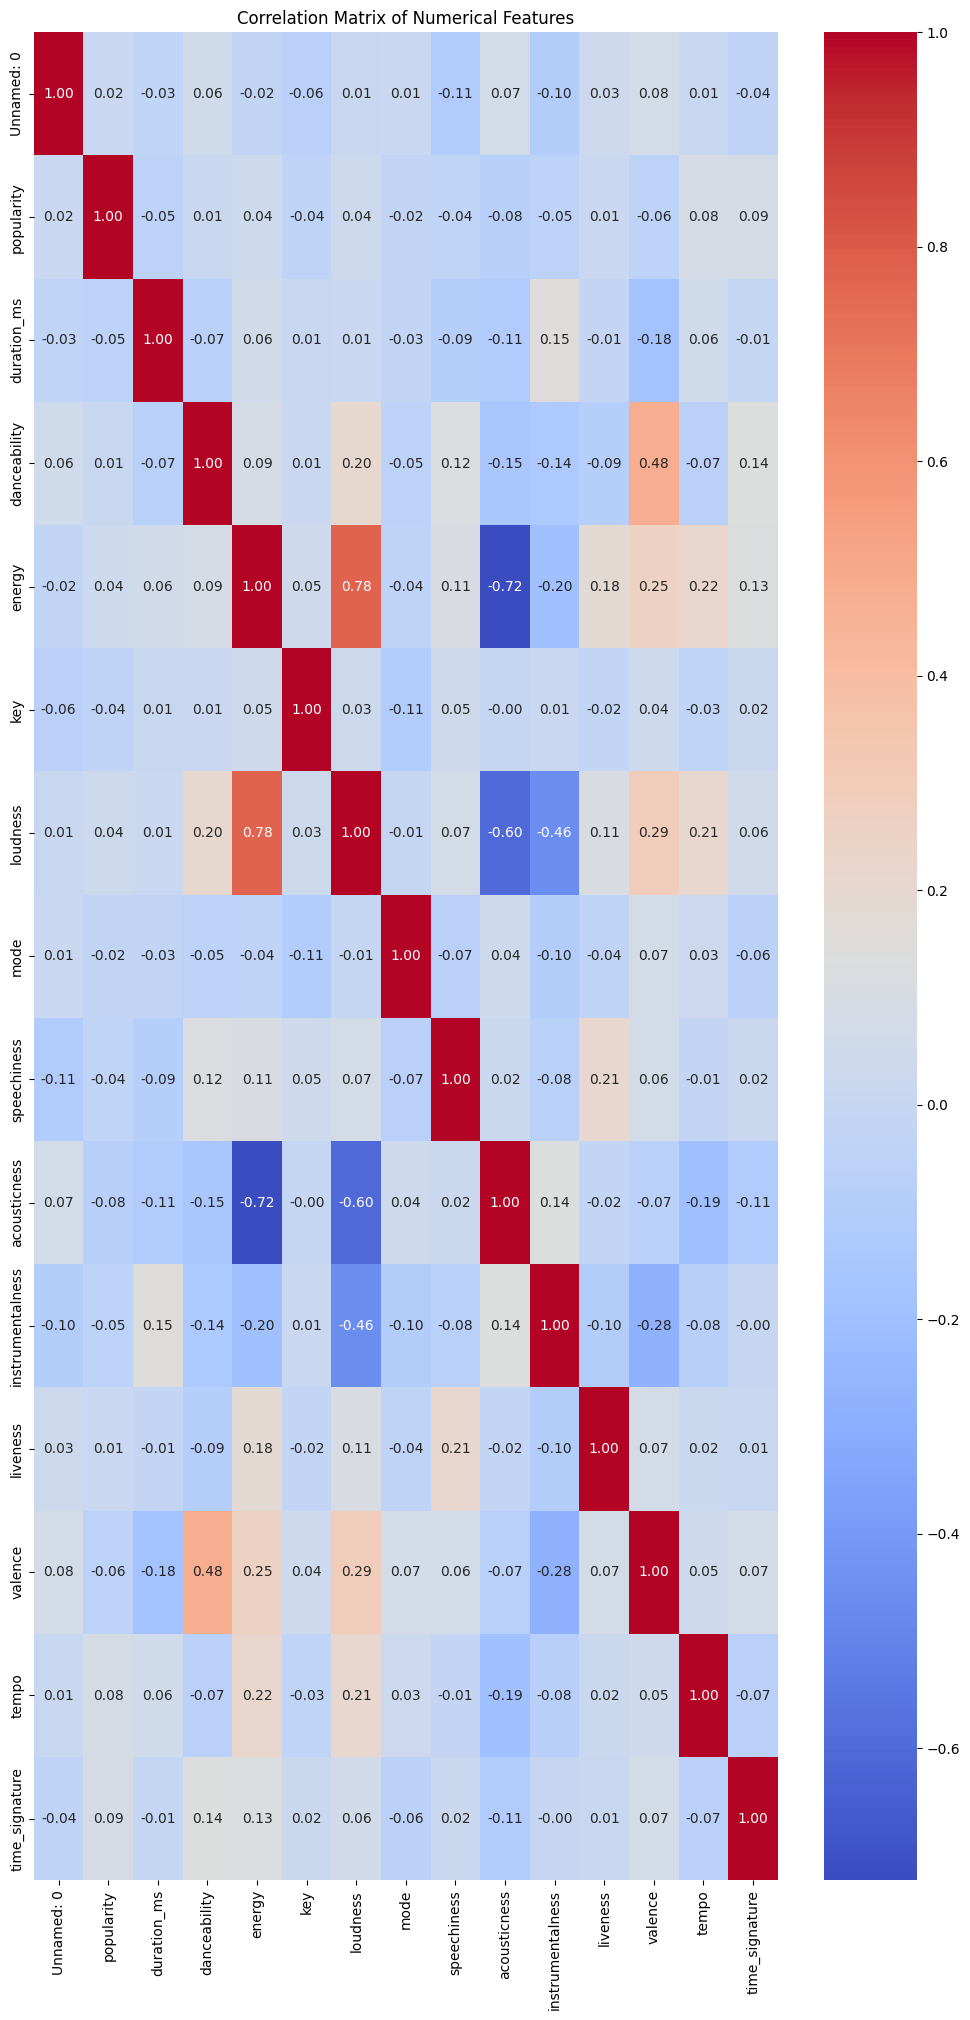

popularity          1.000000
time_signature      0.088808
tempo               0.084685
energy              0.041335
loudness            0.035610
Unnamed: 0          0.015871
liveness            0.012262
danceability        0.008102
mode               -0.023744
speechiness        -0.036486
key                -0.042277
instrumentalness   -0.050289
duration_ms        -0.051998
valence            -0.056673
acousticness       -0.077723
Name: popularity, dtype: float64
popularity          1.000000
time_signature      0.088808
tempo               0.084685
energy              0.041335
loudness            0.035610
Unnamed: 0          0.015871
liveness            0.012262
danceability        0.008102
mode               -0.023744
speechiness        -0.036486
key                -0.042277
instrumentalness   -0.050289
duration_ms        -0.051998
valence            -0.056673
acousticness       -0.077723
Name: popularity, dtype: float64


In [15]:
columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'explicit']
new_random_sample = random_sample.drop(columns=[col for col in columns_to_drop if col in random_sample.columns], axis=1)
# new_random_sample = pd.get_dummies(new_random_sample, columns=['explicit', 'track_genre'], drop_first=True)

corr_matrix = new_random_sample.corr()
print(corr_matrix.nunique())
print(corr_matrix.columns)
# Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Check specific correlations with 'popularity'
corr_with_popularity = corr_matrix['popularity'].sort_values(ascending=False)

print(corr_with_popularity)
print(corr_matrix['popularity'].sort_values(ascending=False))

# outliers - song duration
# boxplots

In [16]:
random_sample.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15925,15925,0AFlaSWOyEUJ9vrPynu1Ur,yaeow,Lost In Between,To Make It Right,44,118400,False,0.523,0.325,...,-14.126,1,0.0707,0.5370,0.00444,0.0992,0.0794,149.488,4,chill
868,868,25fcj6d2W1l8DQL11Czdzb,Brandi Carlile;Sam Smith,Party of One (feat. Sam Smith),Party of One (feat. Sam Smith),56,259558,False,0.354,0.206,...,-11.799,1,0.0365,0.7790,0.00021,0.0959,0.2020,139.056,4,acoustic
104771,104771,7lCdoKEyeSsRSvdiVDBHNn,Yung Beef;Pablo Chill-E;Jaguarclaw,Shishi Plugg,USA (feat. JaguarClaw),29,181115,True,0.665,0.727,...,-5.994,1,0.2230,0.0961,0.00000,0.0952,0.3050,161.954,4,spanish
111387,111387,4b05249aB00z3v3Eo19wNc,Morcheeba,The Platinum Collection,Blindfold,21,278679,False,0.572,0.738,...,-6.738,1,0.0348,0.0281,0.02740,0.0555,0.2150,161.949,4,trip-hop
77532,77532,3CBOvR0mJYZF1uq8vyjj3y,Grupo Clareou;Belo,Posso Te Chamar de Mô,Posso Te Chamar de Mô,44,198618,False,0.496,0.776,...,-5.765,1,0.0476,0.5610,0.00000,0.9550,0.7850,81.826,4,pagode


Regularization (both Ridge and Lasso)

In [17]:
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_validate


In [18]:
# change this
X = []
# scale the predictors
X_std = (X - X.mean()) / X.std()
y = []

AttributeError: 'list' object has no attribute 'mean'

Perform Ridge Regression
Using 10-fold cross-validation to select the best lambda (alpha) value for the ridge regression model

In [ ]:
# note that the start/stop values in the first two arguments are the exponents
alphas = np.logspace(-1, 6, 100)

# create an empty list to store the cross-validation scores
ridge_cv_scores = []

# create a for loop to compute the cross-validation score for each alpha value
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge_cv = cross_validate(estimator=ridge,
                              X=X_std,
                              y=y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')
    ridge_cv_scores.append({'alpha': alpha,
                            'log_alpha': np.log(alpha),
                            'test_mse': -np.mean(ridge_cv['test_score'])})

# convert the cross-validation scores into a data frame
ridge_cv_scores_df = pd.DataFrame(ridge_cv_scores)

# plot the cross-validation scores as a function of alpha
px.line(ridge_cv_scores_df,
        x='log_alpha',
        y='test_mse',
        title='Ridge')

Perform Lasso Regression
Using 10-fold cross-validation to select the best lambda (alpha) value for the lasso regression model

In [ ]:
# define the alpha values to test
alphas = np.logspace(-1, 4, 100)

# create an empty list to store the cross-validation scores
lasso_cv_scores = []

# create a for loop to compute the cross-validation score for each alpha value
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso_cv = cross_validate(estimator=lasso,
                              X=X_std,
                              y=y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')
    lasso_cv_scores.append({'alpha': alpha,
                            'log_alpha': np.log(alpha),
                            'test_mse': -np.mean(lasso_cv['test_score'])})

# convert the cross-validation scores into a data frame
lasso_cv_scores_df = pd.DataFrame(lasso_cv_scores)

# plot the cross-validation scores as a function of alpha
px.line(lasso_cv_scores_df,
        x='log_alpha',
        y='test_mse',
        title='Lasso')

Get the best alpha values for each fit (ridge and lasso)

In [ ]:
# identify the value of alpha that minimizes the cross-validation score for ridge
ridge_alpha_min = ridge_cv_scores_df.sort_values(by='test_mse').head(1).alpha.values[0]
# compute the min MSE and the SE of the MSE
mse_se_ridge = ridge_cv_scores_df['test_mse'].std() / np.sqrt(10)
mse_min_ridge = ridge_cv_scores_df['test_mse'].min()


# identify the value of alpha that minimizes the cross-validation score for ridge within 1SE
ridge_alpha_1se = ridge_cv_scores_df[(ridge_cv_scores_df['test_mse'] <= mse_min_ridge + mse_se_ridge) &
                                     (ridge_cv_scores_df['test_mse'] >= mse_min_ridge - mse_se_ridge)].sort_values(by='alpha', ascending=False).head(1).alpha.values[0]


# identify the value of alpha that minimizes the cross-validation score for lasso
lasso_alpha_min = lasso_cv_scores_df.sort_values(by='test_mse').head(1).alpha.values[0]
# compute the min MSE and the SE of the MSE
mse_se_lasso = lasso_cv_scores_df['test_mse'].std() / np.sqrt(10)
mse_min_lasso = lasso_cv_scores_df['test_mse'].min()

# identify the value of alpha that minimizes the cross-validation score for lasso within 1SE
lasso_alpha_1se = lasso_cv_scores_df[(lasso_cv_scores_df['test_mse'] <= mse_min_lasso + mse_se_lasso) &
                                     (lasso_cv_scores_df['test_mse'] >= mse_min_lasso - mse_se_lasso)].sort_values(by='alpha', ascending=False).head(1).alpha.values[0]


In [ ]:
print('Ridge (min): ', ridge_alpha_min)
print('Ridge (1SE): ', ridge_alpha_1se)
print('Lasso (min): ', lasso_alpha_min)
print('Lasso (1SE): ', lasso_alpha_1se)

Fit the ridge and lasso models

In [ ]:
# use ridge_alpha_min to fit the ridge regression model
ridge_min_fit = Ridge(alpha=ridge_alpha_min).fit(X=X_std, y=y)
ridge_1se_fit = Ridge(alpha=ridge_alpha_1se).fit(X=X_std, y=y)

# use lasso_alpha_min to fit the lasso regression model
lasso_min_fit = Lasso(alpha=lasso_alpha_min).fit(X=X_std, y=y)
lasso_1se_fit = Lasso(alpha=lasso_alpha_1se).fit(X=X_std, y=y)